In [13]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# Load dataset
Here we use the MNIST Fashion Dataset, included in Keras. <br>
It includes pixel data of clothing articles - 60,000 images for training and 10,000 images for testing.

In [14]:
# Load dataset
fashion_mnist = keras.datasets.fashion_mnist

# Derive train & test set
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [15]:
print(train_images.shape)
print(type(train_images))
print(train_images)

(60000, 28, 28)
<class 'numpy.ndarray'>
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


So we have 60,000 28*28 pixel images.

In [16]:
# Printing just 1 pixel
print(train_images[0,23,5])

191


191 is the gray scale value of that specific pixel.

In [17]:
# training labels
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Our labels are integers from 0 to 9 that represent a specific article of clothing. <br>
Now we create an array of label names to indicate which is which.

In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Now let's look at what some of the images look like!

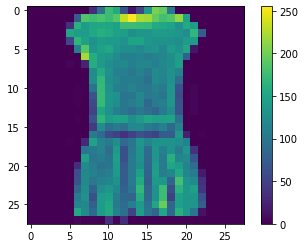

In [19]:
plt.figure()
# show image itself
plt.imshow(train_images[3])
# show color bar
plt.colorbar()
# don't show grid
plt.grid(False)
plt.show()

# Data Preprocessing
Here we scale all our greyscale pixel values (0-255) to between 0 and 1. These smaller values makes it easier for the model to process our values.

In [20]:
train_images = train_images/255.0
test_images = test_images/255.0

# Build the model

In [21]:
# Building the ANN
model = keras.Sequential([
    # Sequential = most basic form of neural networks - info going from left to right thru the layers
    keras.layers.Flatten(input_shape=(28,28)), # input layer = flatten a 28*28 pixels to 1D 784 pixels
    keras.layers.Dense(128, activation='relu'), # hidden layer 1 =  
    # "Dense" means every neuron in previous layer is connected to current layer
    # 'relu' = activation linear unit (an activation function)
    keras.layers.Dense(10, activation='softmax') # output layer = 10 outputs (for 10 classes)
    # 'softmax' ensures output is between 0 & 1
])

# Compile the model

In [22]:
# Optimising the ANN
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model

In [23]:
model.fit(train_images, train_labels, epochs=10)
# We can find test accuracy based on different no. of epochs

Epoch 1/10
1875/1875 [==============================] - 11s 3ms/step - loss: 0.5012 - accuracy: 0.8251
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3772 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3391 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3138 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2954 - accuracy: 0.8927
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2810 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2713 - accuracy: 0.9002: 0s - loss:
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2602 - accuracy: 0.9026
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2491 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step 

# Test the Model

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print("Test accuracy: ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3390 - accuracy: 0.8838
Test accuracy:  0.8838000297546387


Here we see overfitting, as accuracy in train is 90.99% but 88.2% in test.

Making predictions

In [25]:
predictions = model.predict(test_images)
# ensure input is array, cuz model is used to predicting arrays
print(predictions[0])
# prints probability distribution of classes for 1st image

[2.7548920e-06 8.7254129e-08 3.3059365e-08 4.1810760e-10 1.5571940e-08
 1.5198160e-03 8.9622756e-07 1.6345524e-03 4.0319392e-09 9.9684191e-01]


Ankle boot


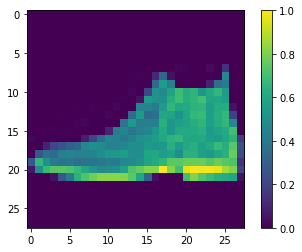

In [26]:
# If we wanna see which class it's predicting, instead of probability distributions...
class_n = np.argmax(predictions[0]) # gets index with highest probability
print(class_names[class_n])

# Visualisation
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

'Ankle boot' prediction matches image!<br>
We can try out different indices.

[[5.7627416e-01 1.5402029e-05 2.6525819e-01 5.9135506e-05 5.0313375e-03
  1.3186798e-07 1.5334506e-01 3.7983632e-08 1.2600055e-05 3.9938527e-06]]


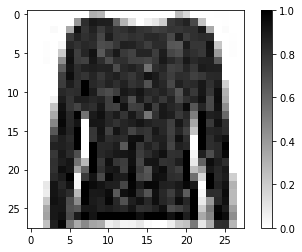

Actual: Shirt
Predicted: T-shirt/top


In [27]:
# model.save("2a) DNN.h5") # h5 is extension specific for Keras, not Tensorflow
# saving our model means we don't have to spend another hour retraining it

new_model = tf.keras.models.load_model('2a) DNN.h5')

COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    print(prediction)
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.show()
    print('Actual: ' + label)
    print('Predicted: '+ guess)

def get_number(images):
    while True:
        num = input("Pick a number: ")
        if num.isdigit() and 0<= int(num)<=images.shape[0]:
            return int(num)
        else:
            print('Try again...')

num = get_number(test_images)
image = test_images[num]
label = test_labels[num]
predict(new_model, image, label)